In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Assignment 1

Euler's Method

In [ ]:
euler_outputs = pd.DataFrame({'step size':[], 'numerical estimate':[], 'estimate error': []})

for k in range(10,21):
  x = 1
  N = 2 ** k
  Del = 1 / N
  for i in range(1, N+1):
    x += Del * x
  
  new_df = pd.DataFrame({'step size':[N],'numerical estimate':[x],'estimate error':[math.e-x]})
  euler_outputs = pd.concat([euler_outputs,new_df])

In [ ]:
euler_outputs

,step size,numerical estimate,estimate error
0,1024.0,2.716956,0.001326
0,2048.0,2.717618,0.000663
0,4096.0,2.717950,0.000332
0,8192.0,2.718116,0.000166
0,16384.0,2.718199,0.000083
0,32768.0,2.718240,0.000041
0,65536.0,2.718261,0.000021
0,131072.0,2.718271,0.000010
0,262144.0,2.718277,0.000005
0,524288.0,2.718279,0.000003


Midpoint Method

In [ ]:
midpoint_outputs = pd.DataFrame({'step size':[], 'numerical estimate':[], 'estimate error': []})

for k in range(10,21):
  x = 1
  N = 2 ** k
  Del = 1 / N
  for i in range(1, N+1):
    k_t = x + Del / 2 * x
    x += Del * k_t
  
  new_df = pd.DataFrame({'step size':[N],'numerical estimate':[x],'estimate error':[math.e-x]})
  midpoint_outputs = pd.concat([midpoint_outputs,new_df])

In [ ]:
midpoint_outputs

,step size,numerical estimate,estimate error
0,1024.0,2.718281,4.317429e-07
0,2048.0,2.718282,1.079753e-07
0,4096.0,2.718282,2.699876e-08
0,8192.0,2.718282,6.750315e-09
0,16384.0,2.718282,1.687626e-09
0,32768.0,2.718282,4.219323e-10
0,65536.0,2.718282,1.054659e-10
0,131072.0,2.718282,2.643086e-11
0,262144.0,2.718282,6.560086e-12
0,524288.0,2.718282,1.751044e-12


Runge-Kutta Method

In [ ]:
rk_outputs = pd.DataFrame({'step size':[], 'numerical estimate':[], 'estimate error': []})

for k in range(10,21):
  x = 1
  N = 2 ** k
  Del = 1 / N
  for i in range(1, N+1):
    k_1 = x
    k_2 = x + Del * k_1 / 2
    k_3 = x + Del * k_2 / 2
    k_4 = x + Del * k_3
    x += Del * (k_1 + 2 * k_2 + 2 * k_3 + k_4) / 6
  
  new_df = pd.DataFrame({'step size':[N],'numerical estimate':[x],'estimate error':[math.e-x]})
  rk_outputs = pd.concat([rk_outputs,new_df])

In [ ]:
rk_outputs

,step size,numerical estimate,estimate error
0,1024.0,2.718282,1.953993e-14
0,2048.0,2.718282,-4.440892e-15
0,4096.0,2.718282,-9.325873e-15
0,8192.0,2.718282,2.131628e-14
0,16384.0,2.718282,-2.220446e-15
0,32768.0,2.718282,1.509903e-14
0,65536.0,2.718282,5.462297e-14
0,131072.0,2.718282,5.595524e-14
0,262144.0,2.718282,-2.886580e-14
0,524288.0,2.718282,1.332268e-13


Visualize Outputs

In [ ]:
all_errors = rk_outputs[['step size']]
all_errors['euler error'] = euler_outputs['estimate error']
all_errors['midpoint error'] = midpoint_outputs['estimate error']
all_errors['rk error'] = rk_outputs['estimate error']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
all_errors

,step size,euler error,midpoint error,rk error
0,1024.0,0.001326,4.317429e-07,1.953993e-14
0,2048.0,0.000663,1.079753e-07,-4.440892e-15
0,4096.0,0.000332,2.699876e-08,-9.325873e-15
0,8192.0,0.000166,6.750315e-09,2.131628e-14
0,16384.0,0.000083,1.687626e-09,-2.220446e-15
0,32768.0,0.000041,4.219323e-10,1.509903e-14
0,65536.0,0.000021,1.054659e-10,5.462297e-14
0,131072.0,0.000010,2.643086e-11,5.595524e-14
0,262144.0,0.000005,6.560086e-12,-2.886580e-14
0,524288.0,0.000003,1.751044e-12,1.332268e-13


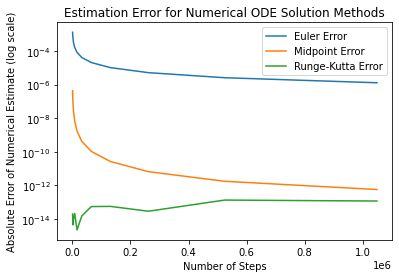

In [ ]:
plt.plot(all_errors['step size'],all_errors['euler error'],label='Euler Error')
plt.plot(all_errors['step size'],all_errors['midpoint error'],label='Midpoint Error')
plt.plot(all_errors['step size'],abs(all_errors['rk error']),label='Runge-Kutta Error')
plt.yscale('log')
plt.title('Estimation Error for Numerical ODE Solution Methods')
plt.xlabel('Number of Steps')
plt.ylabel('Absolute Error of Numerical Estimate (log scale)')
plt.legend()

Assignment 2

In [ ]:
def euler_method(x_0, N, f, params):

  A = [[x_0[i] for i in range(len(x_0))]]
  Del = 1 / N
  for i in range(1, 30 * N+1):
    x_0 += Del * f(x_0, params)
    A.append([x_0[i] for i in range(len(x_0))])
  
  return np.array(A)

In [ ]:
def midpoint_method(x_0, N, f, params):

  Del = 1 / N
  A = [[x_0[i] for i in range(len(x_0))]]

  for i in range(1, 30 * N+1):
    k_t = x_0 + Del / 2 * f(x_0, params)
    x_0 += Del * f(k_t, params)
    A.append([x_0[i] for i in range(len(x_0))])

  return np.array(A)

In [ ]:
def lotka_volterra(arr, params):

  x,y = arr[0],arr[1]
  k,l,a,b = params[0],params[1],params[2],params[3]

  v_0 = x * (k - a * y)
  v_1 = -1 * y * (l - b * x)

  return np.array([v_0,v_1])

Initial Test

In [ ]:
A = euler_method(np.array([2.0,2.0]), 2 ** 10, lotka_volterra, [1,1,1,1])
df = pd.DataFrame(A)

df

,0,1
0,2.000000,2.000000
1,1.998047,2.001953
2,1.996092,2.003904
3,1.994135,2.005854
4,1.992176,2.007801
...,...,...
30716,0.251702,0.980652
30717,0.251707,0.979936
30718,0.251712,0.979220
30719,0.251717,0.978504


Text(0, 0.5, 'Prey Population')

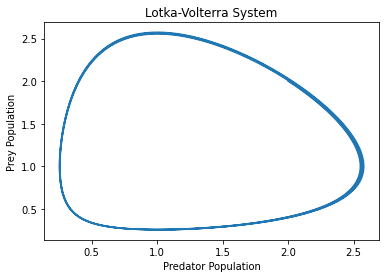

In [ ]:
df.columns = ['prey','predator']

plt.plot(df['predator'],df['prey'])
plt.title('Lotka-Volterra System')
plt.xlabel('Predator Population')
plt.ylabel('Prey Population')

Plotting Multiple ODE Systems

In [ ]:
def gen_curves(method, x_0, N, f, params):

  if method == 'Euler':
    A = euler_method(x_0,N,f,params)
  elif method == 'Midpoint':
    A = midpoint_method(x_0,N,f,params)

  df = pd.DataFrame(A)
  df.columns = ['prey','predator']

  return df


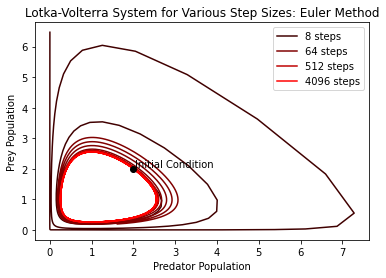

In [ ]:
for i in range(3, 13, 3):
  df = gen_curves('Euler', np.array([2.0,2.0]), 2 ** i, lotka_volterra, [1,1,1,1])
  plt.plot(df['predator'],df['prey'],label=str(2 ** i)+' steps', color = (i/12,0,0))

plt.title('Lotka-Volterra System for Various Step Sizes: Euler Method')
plt.xlabel('Predator Population')
plt.ylabel('Prey Population')
plt.plot([2.0],[2.0],marker='o', color='Black')
plt.annotate('Initial Condition', (2.05,2.05))
plt.legend()

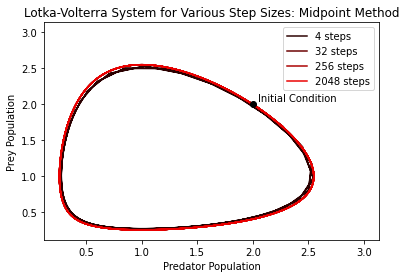

In [ ]:
for i in range(2, 13, 3):
  df = gen_curves('Midpoint', np.array([2.0,2.0]), 2 ** i, lotka_volterra, [1,1,1,1])
  plt.plot(df['predator'],df['prey'],label=str(2 ** i)+' steps', color = (i/12,0,0))

plt.title('Lotka-Volterra System for Various Step Sizes: Midpoint Method')
plt.xlabel('Predator Population')
plt.ylabel('Prey Population')
plt.plot([2.0],[2.0],marker='o', color='Black')
plt.plot([3.0],[3.0],marker='o', color='white')
plt.annotate('Initial Condition', (2.05,2.05))
plt.legend()

Text(0, 0.5, 'Prey Population')

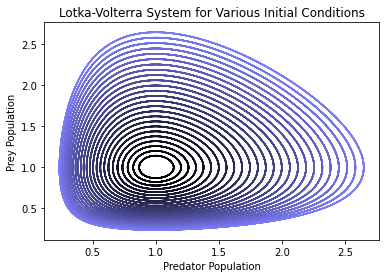

In [ ]:
for i in range(25):
  df = gen_curves('Midpoint', np.array([1.1 + i/25 ,1.1 + i/25]), 2 ** 5, lotka_volterra, [1,1,1,1])
  plt.plot(df['predator'],df['prey'], color = (i/50,i/50,i/25))

plt.title('Lotka-Volterra System for Various Initial Conditions')
plt.xlabel('Predator Population')
plt.ylabel('Prey Population')

Text(0, 0.5, 'Prey Population')

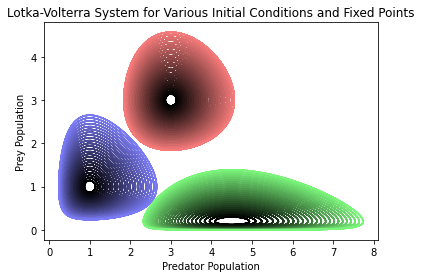

In [ ]:
for i in range(25):
  df = gen_curves('Midpoint', np.array([1.1 + i/25 ,1.1 + i/25]), 2 ** 6, lotka_volterra, [1,1,1,1])
  plt.plot(df['predator'],df['prey'], color = (i/50,i/50,i/25))

for i in range(25):
  df = gen_curves('Midpoint', np.array([3.1 + i/25 ,3.1 + i/25]), 2 ** 6, lotka_volterra, [3,3,1,1])
  plt.plot(df['predator'],df['prey'], color = (i/25,i/50,i/50))

for i in range(25):
  df = gen_curves('Midpoint', np.array([0.3 + i/25 ,4.6 + i/25]), 2 ** 6, lotka_volterra, [4.5,1/5,1,1])
  plt.plot(df['predator'],df['prey'], color = (i/50,i/25,i/50))

plt.title('Lotka-Volterra System for Various Initial Conditions and Fixed Points')
plt.xlabel('Predator Population')
plt.ylabel('Prey Population')

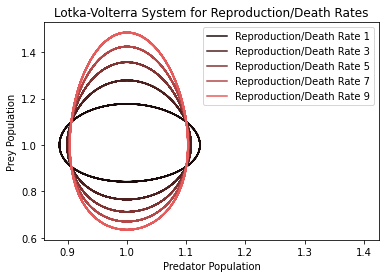

In [ ]:
for i in range(1,10,2):
  df = gen_curves('Midpoint', np.array([1.1 ,1.1]), 2 ** 6, lotka_volterra, [2*i,1,2*i,1])
  plt.plot(df['predator'],df['prey'], color = (2*i/20,2*i/50,2*i/50),label='Reproduction/Death Rate '+str(i))

plt.title('Lotka-Volterra System for Reproduction/Death Rates')
plt.xlabel('Predator Population')
plt.ylabel('Prey Population')
plt.plot([1.4],[1.0],marker='o', color='white')
plt.legend()

What happens if we introduce randomness?

In [ ]:
def lotka_volterra_r(arr, params):

  x,y = arr[0],arr[1]
  k,l,a,b = params[0],params[1],params[2],params[3]
  sigma = params[4]

  v_0 = x * (k - a * y)
  v_1 = -1 * y * (l - b * x)

  return np.array([v_0,v_1]) + params[4]*np.random.standard_normal()

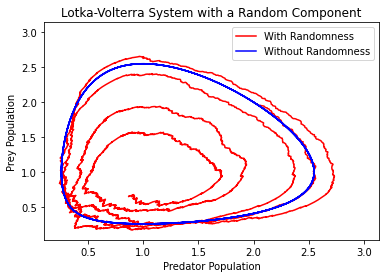

In [ ]:
df = gen_curves('Midpoint', np.array([2.0, 2.0]), 2 ** 8, lotka_volterra_r, [1,1,1,1,1])
plt.plot(df['predator'],df['prey'], color = (1,0,0),label='With Randomness')

df = gen_curves('Midpoint', np.array([2.0, 2.0]), 2 ** 8, lotka_volterra_r, [1,1,1,1,0])
plt.plot(df['predator'],df['prey'], color = (0,0,1),label='Without Randomness')

plt.title('Lotka-Volterra System with a Random Component')
plt.xlabel('Predator Population')
plt.ylabel('Prey Population')
plt.plot([3.0],[3.0],marker='o', color='white')
plt.legend()

Assignment 3

Van Der Pol Equation

In [ ]:
def van_der_pol(arr, params):
  mu = params[0]
  p,v = arr[0],arr[1]

  p_a = v 
  v_a = mu * (1 - p ** 2) * v - p

  return np.array([p_a,v_a])

In [ ]:
def gen_curves(method, x_0, N, f, params):

  if method == 'Euler':
    A = euler_method(x_0,N,f,params)
  elif method == 'Midpoint':
    A = midpoint_method(x_0,N,f,params)

  df = pd.DataFrame(A)
  df.columns = ['position','velocity']

  return df


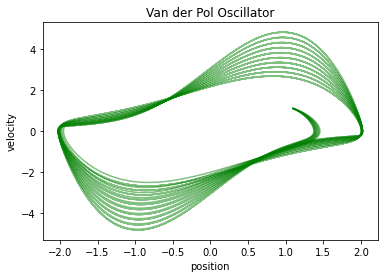

In [ ]:
for i in range(10,30,2):
  df = gen_curves('Midpoint', np.array([1.1 ,1.1]), 2 ** 11, van_der_pol, [i/10])
  plt.plot(df['position'],df['velocity'], color = (0,0.5,0),label='Mu'+str(i),alpha=0.5)

plt.title('Van der Pol Oscillator')
plt.xlabel('position')
plt.ylabel('velocity')
plt.plot([1.4],[1.0],marker='o', color='white')
# plt.legend()